<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

Text(0.5, 0, 'Time (mins)')

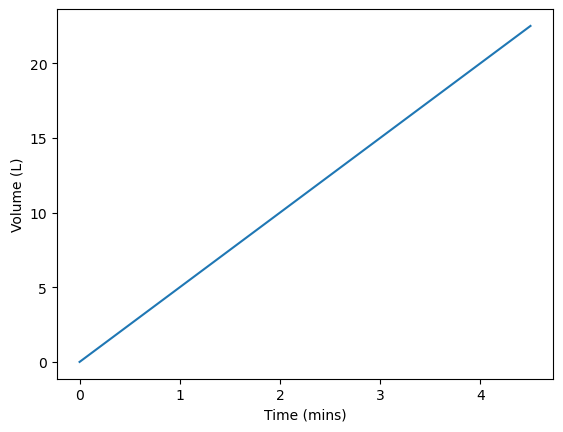

In [1]:
from matplotlib import pyplot as plt

max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)    # Record volume
    dV = rate * dt               # Calculate change in volume
    volume += dV                 # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume (L)')
plt.xlabel('Time (mins)')

### 1.2 An overflowing bucket

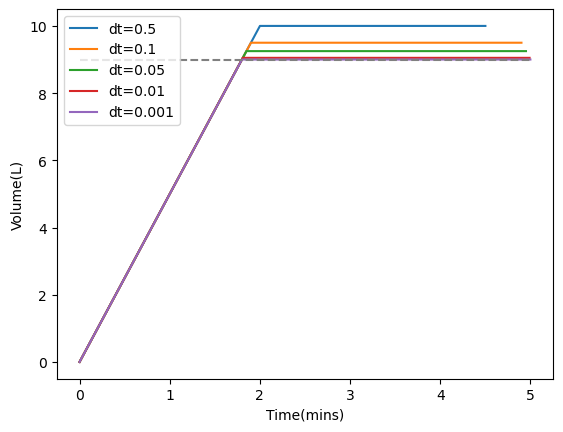

In [7]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L

for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []                  # To keep track of all volumes
    volume = 0                       # Starting volume

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV

    plt.plot(all_time, all_volume, label=f'dt={dt}')

plt.ylabel('Volume (L)')
plt.xlabel('Time (mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()

### 1.3 A leaky bucket

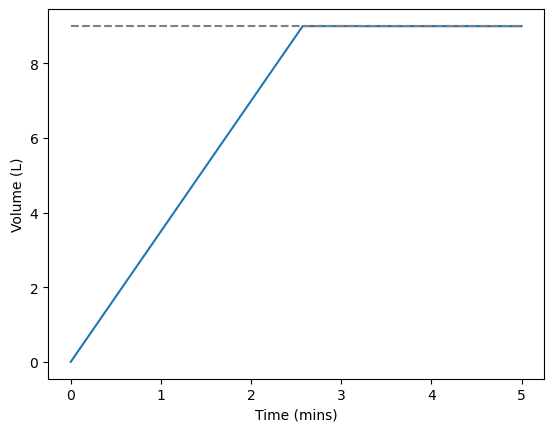

In [2]:
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)

    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume

    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume (L)')
plt.xlabel('Time (mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.4 Let’s turn off the tap

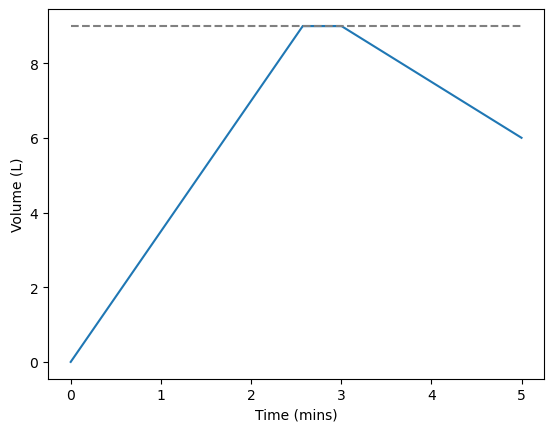

In [3]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume (L)')
plt.xlabel('Time (mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### Using while

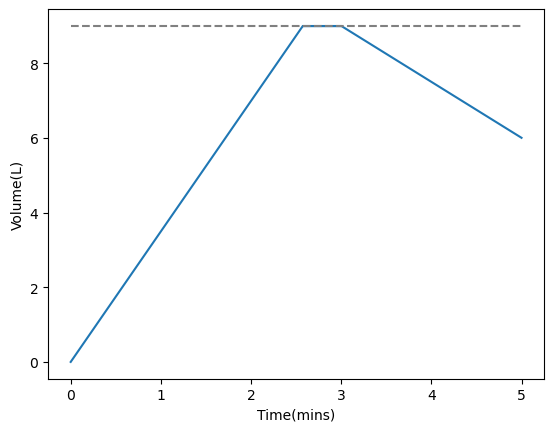

In [4]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    all_time.append(time)                                                   # Initial loop: append time 0 and volume 0 to lists
    all_volume.append(volume)                                               # Subsequent loops: append time and volume at intervals dt and dV
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.5 A quick summary

To fill a infinite bucket: 
- `for` loop to repeatedly generate volume at regular intervals of time.

To fill a finite bucket:
- Add a 'capacity' variable.
- Add an `if` statement in `for` loop to ensure that once volume reaches 'capacity', volume remains constant.
- Ensure that time interval is small enough such that any changes to volume is more accurately depicted.

To fill a leaking bucket:
- Include leak rate variable
- Subtract volume leaked out per time interval from the volume added before `if` statement.

To fill, then empty a leaking bucket:
- Include time variable when volume is not added.
- Add the extra condition to `if` statement to ensure that volume increases only when both conditions are met. 


### 1.6 We just solved a differential equation!

yey

## 2 Simulating Radioactivity

### 2.1 Introduction

### 2.2 Approximating the differential equation

In [ ]:

# Your code here


### 2.3 Getting a feel

|Step|Time|$N(t)\ (\times 10^9)$|$\Delta t$ (million years)|$\Delta N (\times 10^9)$|
|:--|:--|:--|:--|:--|


### 2.4 Let’s write some code

(0.0, 0.045)

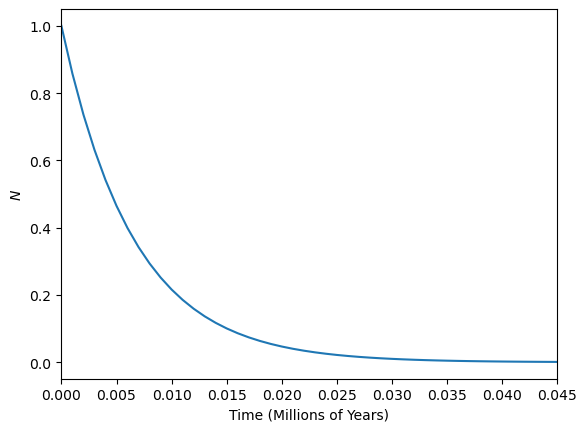

In [10]:
decay_constant = 142   # per million years
stop_fraction = 1E-3   # stop when sample has shrunk to this fraction of the starting value

N0 = 1
dt = .001
time, N = 0, N0

all_N, all_time = [], []

while True:
    all_time.append(time)
    all_N.append(N)
    
    dN = -decay_constant*N*dt
    N += dN
    
    if N < N0*stop_fraction:
        break
        
    time += dt
    
plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time (Millions of Years)')
plt.xlim(0,0.045)



### 2.5 Some things to note about the code

In [ ]:

# Your code here

### 2.6 A quick summary

In [ ]:

# Your code here


## Exercise 1 :  A more realistic leak

In [54]:
def leak_rate(volume):
    h = (volume*(10**-3)) / 0.07   # in metres
    
    leak = 0.0001 * np.sqrt(2*9.8*h) / (10**-3) * 60  
    # converting m^3 s^-1 to L min^-1
    return leak

C:\Users\seana\AppData\Local\Temp\ipykernel_12992\1706227105.py:4: RuntimeWarning: invalid value encountered in sqrt
  leak = 0.0001 * np.sqrt(2*9.8*h) / (10**-3) * 60


(0.0, 2.5)

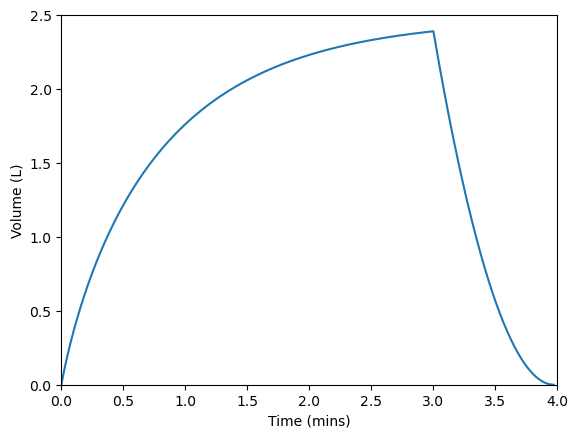

In [69]:
tap_off_time = 3                 
max_time = 5                    
dt = .001                        
rate = 5                                           
volume = 0

all_volume = []             
all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leakrate = leak_rate(volume)       # determines leak rate at given volume
    leakvolume = leakrate * dt
    volume -= leakvolume

    if time < tap_off_time:
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume (L)')
plt.xlabel('Time (mins)')
plt.xlim(0,4)
plt.ylim(0,2.5)